In [15]:
import pathlib

OUT_DIR = pathlib.Path('./out/')

In [16]:
import torch
import matplotlib.pyplot as plt

TIME_STEPS = 100
t = torch.linspace(0.0, 1.0, TIME_STEPS)

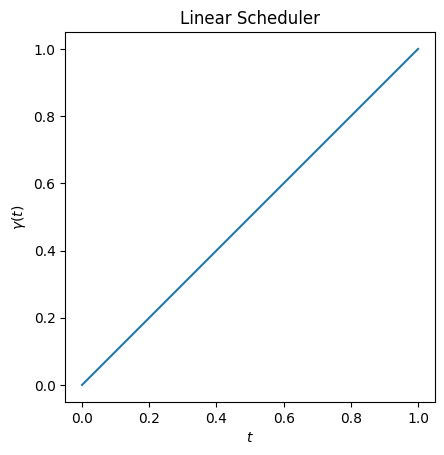

In [17]:
from diffusion.schedule import LinearScheduler
                                
scheduler = LinearScheduler()
plt.xlabel('$t$')
plt.ylabel('$\\gamma(t)$')
plt.title('Linear Scheduler')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, scheduler(t))
plt.savefig(OUT_DIR / 'plot-linear.svg', bbox_inches='tight', pad_inches=0)

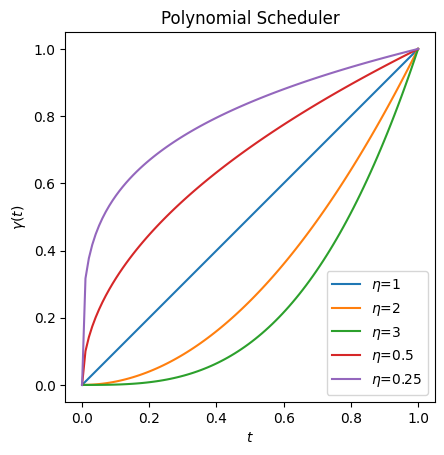

In [18]:
from diffusion.schedule import PolynomialScheduler

variants = [
    { 'tau': 1 },
    { 'tau': 2 },
    { 'tau': 3 },
    { 'tau': 1/2 },
    { 'tau': 1/4 },
]

plt.xlabel('$t$')
plt.ylabel('$\\gamma(t)$')
plt.title('Polynomial Scheduler')
plt.gca().set_aspect('equal', adjustable='box')
for variant in variants:
    scheduler = PolynomialScheduler(**variant)
    plt.plot(t, scheduler(t), label=f"$\\eta$={variant['tau']}")
plt.legend()
plt.savefig(OUT_DIR / 'plot-polynomial.svg', bbox_inches='tight', pad_inches=0)

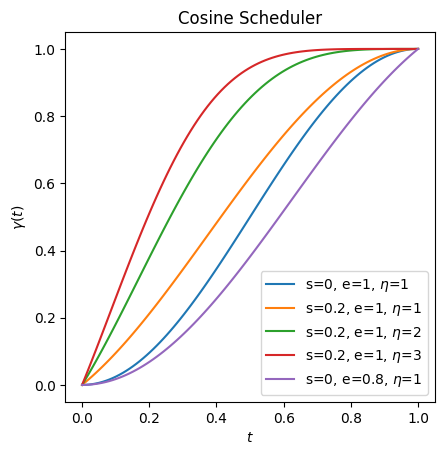

In [19]:
from diffusion.schedule import CosineScheduler

variants = [
    { 'start': 0, 'end': 1, 'tau': 1 },
    { 'start': 0.2, 'end': 1, 'tau': 1 },
    { 'start': 0.2, 'end': 1, 'tau': 2 },
    { 'start': 0.2, 'end': 1, 'tau': 3 },
    { 'start': 0, 'end': 0.8, 'tau': 1 },
]

plt.xlabel('$t$')
plt.ylabel('$\\gamma(t)$')
plt.title('Cosine Scheduler')
plt.gca().set_aspect('equal', adjustable='box')
for variant in variants:
    scheduler = CosineScheduler(**variant)
    plt.plot(t, scheduler(t), label=f"s={variant['start']}, e={variant['end']}, $\\eta$={variant['tau']}")
plt.legend()
plt.savefig(OUT_DIR / 'plot-cosine.svg', bbox_inches='tight', pad_inches=0)

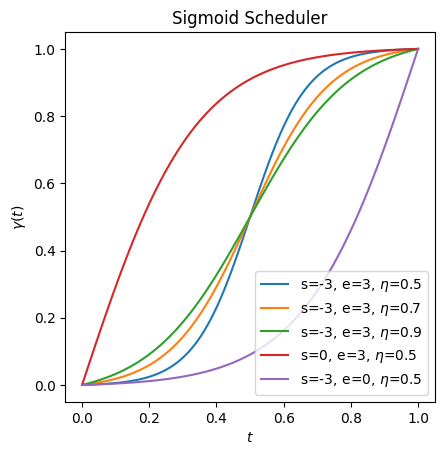

In [38]:
from diffusion.schedule import SigmoidScheduler

variants = [
    { 'start': -3, 'end': 3, 'tau': 0.5 },
    { 'start': -3, 'end': 3, 'tau': 0.7 },
    { 'start': -3, 'end': 3, 'tau': 0.9 },
    { 'start': 0, 'end': 3, 'tau': 0.5 },
    { 'start': -3, 'end': 0, 'tau': 0.5 }
]

plt.xlabel('$t$')
plt.ylabel('$\\gamma(t)$')
plt.title('Sigmoid Scheduler')
plt.gca().set_aspect('equal', adjustable='box')
for variant in variants:
    scheduler = SigmoidScheduler(**variant)
    plt.plot(t, scheduler(t), label=f"s={variant['start']}, e={variant['end']}, $\\eta$={variant['tau']}")
plt.legend(loc='lower right')
plt.savefig(OUT_DIR / 'plot-sigmoid.svg', bbox_inches='tight', pad_inches=0)
